c:\Users\luyuk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


YF.download() has changed argument auto_adjust default to True
Amount of data captured: 1688



Key statistical indicators:
Mean Daily Return               0.001456
Standard Deviation              0.029537
Annualized Volatility           0.468879
Sharpe Ratio                    0.782577
Max Drawdown                   -0.760623
Average Volume          138211151.179315
ADX Average                    24.595059
Overbought Ratio                0.224983
Oversold Ratio                  0.215581


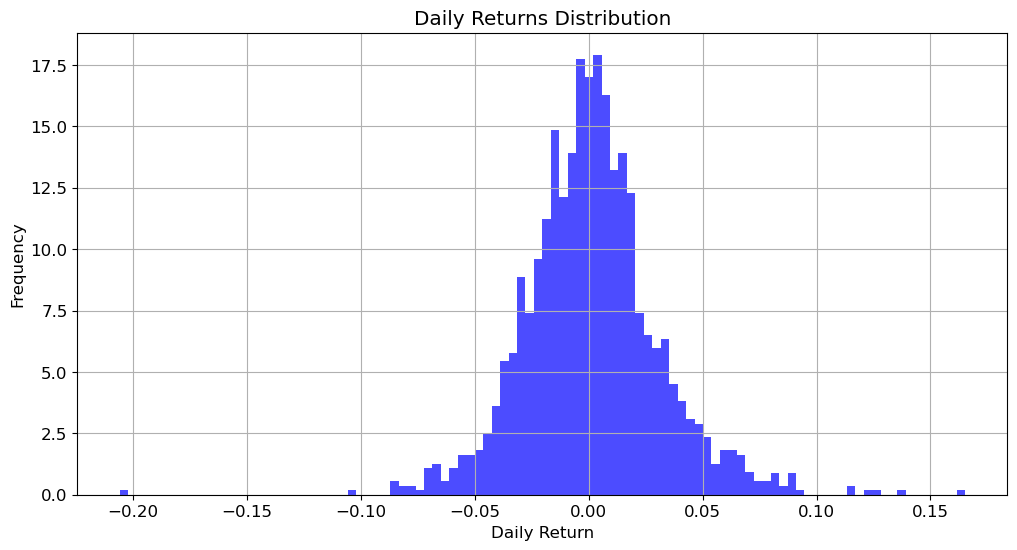

Folder './output/01810' already exists.


c:\Users\luyuk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



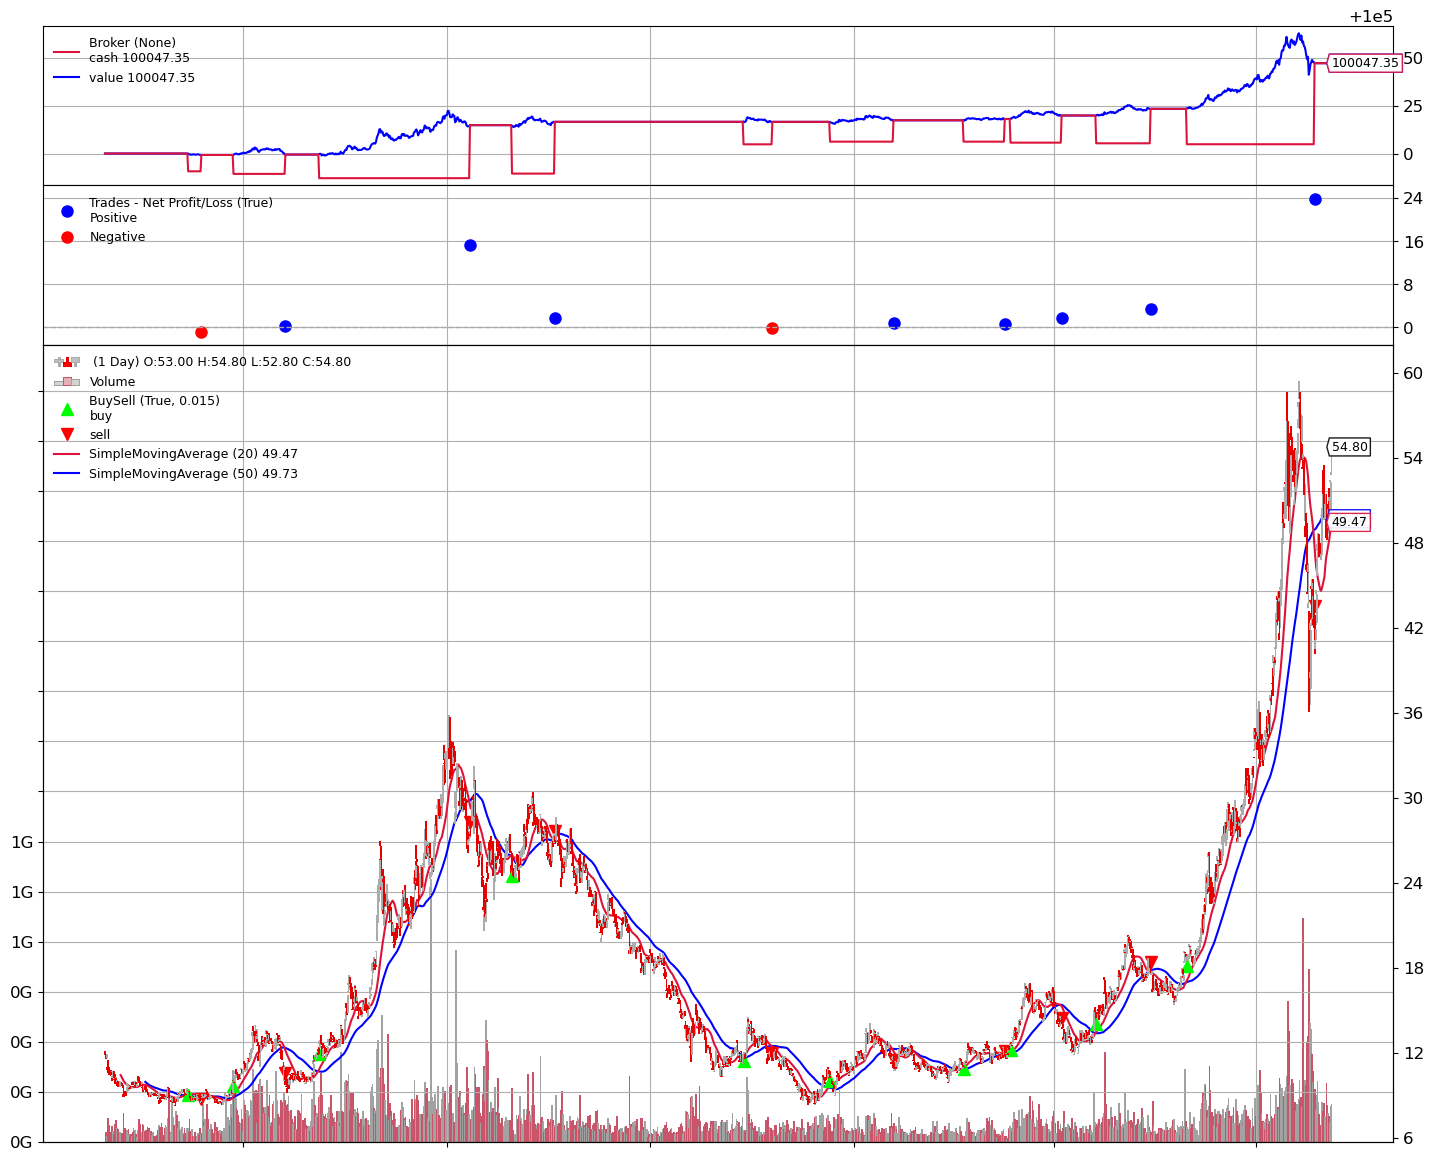

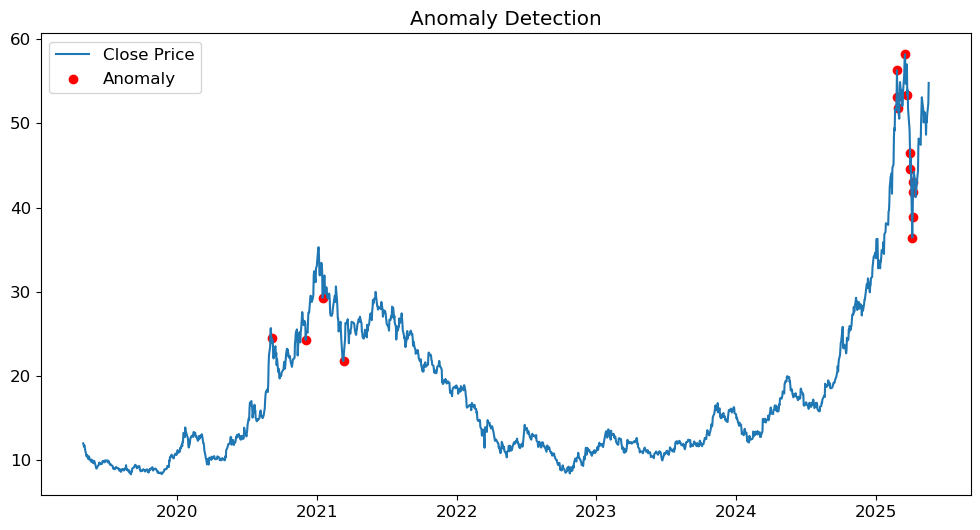

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
from src.data_fetch import *
from src.preprocessing import *
from src.statistics import *
from src.visualization import *
from src.advanced_analysis import *
from src.price_forecast import *

if __name__ == "__main__":
    ticker_symbol = "1810.HK"
    stock_id = ticker_symbol.split('.')[0].zfill(5)

    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    pd.set_option('display.max_columns', None)

    df = fetch_stock_data(ticker_symbol, years=10)
    df.columns = df.columns.get_level_values(0)  # Keep only the first level
    print(f"Amount of data captured: {len(df)}")
    # print(df.head())

    df = calculate_technical_indicators(df)
    create_interactive_chart(df)

    print("\nKey statistical indicators:")
    statistics = calculate_statistics(df)
    print(statistics.to_string())

    plot_return_distribution(df)

    if not os.path.exists(f"./output/{stock_id}"):
        os.makedirs(f"./output/{stock_id}")
        print(f"Folder '{stock_id}' created.")
    else:
        print(f"Folder './output/{stock_id}' already exists.")
    # df.to_csv(f"./output/{stock_id}/time_series_analysis_{datetime.now().strftime('%Y%m%d')}.csv", index=True)
    
    ####################
    # Advance Analysis #
    ####################
    volatility_clustering(df, stock_id)
    run_backtest(df, stock_id)
    anomaly_detection(df, stock_id)
    # Save the updated df
    df.to_csv(f"./output/{stock_id}/enhanced_time_series_analysis_{datetime.now().strftime('%Y%m%d')}.csv", index=True)


    # lstm_price_prediction(df, stock_id)
    # # Obtain the last 60 days of data
    # last_60_days = df[['Close']].iloc[-60:] 
    # predictions = predict_future(stock_id, last_60_days, 30)
    
    # feature_cols = ['Close','High','Low','Open','Volume','RSI_14']
    # model, scaler = lstm_price_prediction_multifeature(df, stock_id, feature_cols, epochs=10, batch_size=32, model_dir=stock_id)
    # last_60 = df[feature_cols].iloc[-60:]
    # preds = predict_future_multifeature(
    #     f"./output/{stock_id}/lstm_model_multifeature.h5",
    #     f"./output/{stock_id}/scaler_multifeature.pkl",
    #     last_60,
    #     feature_cols,
    #     predict_days = 30,
    #     time_step = 60
    # )

In [18]:
!python time_series_analysis.py --ticker "1810.HK" --years 10

YF.download() has changed argument auto_adjust default to True
Amount of data captured: 1688

Key statistical indicators:
Mean Daily Return               0.001456
Standard Deviation              0.029537
Annualized Volatility           0.468879
Sharpe Ratio                    0.782577
Max Drawdown                   -0.760623
Average Volume          138211151.179315
ADX Average                    24.595059
Overbought Ratio                0.224983
Oversold Ratio                  0.215581
Figure(1200x600)
Folder '01810' created.


c:\Users\luyuk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\luyuk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
!python web_crawlers.py --ticker "1810.HK"

Namespace(ticker='1810.HK')
[{'title': '寧德時代向國際承銷商增發逾2000萬股H股 - 香港電台新聞主頁', 'description': '寧德時代向國際承銷商增發逾2000萬股H股  香港電台新聞主頁維權投資者David Webb警告寧德時代H股流通股數量過低  Yahoo 財經《輪動華泰》上日最多資金追寧德購 留意全新寧德購16784  AASTOCKS.com寧德時代3750｜寧王衝破330元 大行齊唱好 H股溢價達10% 基金仍未追夠  香港經濟日報HKET港股高開54點 恒指報23736點  news.tvb.com', 'published date': 'Wed, 21 May 2025 01:58:00 GMT', 'url': 'https://news.google.com/rss/articles/CBMib0FVX3lxTE9XOF8wR2Q3VDhHb2E1Y3JEMW81Ykk4TktTLUU4eHBpdW9PcnFSUDJvT19zOWt4SnRzdnBmMTVzN3dXcTlmd3VvMl95V0FyNmwwOXk2Ymk4ZUhQT01tVzRyWVNha2lyekh6SXRYcW02WQ?oc=5&hl=en-GB&gl=GB&ceid=GB:en', 'publisher': {'href': 'https://news.rthk.hk', 'title': '香港電台新聞主頁'}}, {'title': '美國全球封殺華為AI晶片 中國商務部回應！ - Yahoo 財經', 'description': '美國全球封殺華為AI晶片 中國商務部回應！  Yahoo 財經[深度] 馬來西亞對華為晶片態度驟冷 中美AI暗戰初露崢嶸  Yahoo 財經中國強硬放話：配合美國封殺華為者 將遭法律制裁  AASTOCKS.com北京：美國擬全球禁用中國晶片 協助執行將涉違反反外國制裁法  香港電台新聞主頁王毅會見美國亞洲協會會長康京和  news.tvb.com', 'published date': 'Wed, 21 May 2025 02:03:26 GMT', 'url': 'https://news.google.com/rss/articles/CBMirgJBVV95cUxOME5iW

In [21]:
!python deepseek_integration.py --ticker "1810.HK" --model "deepseek-chat"

Here is the analysis for stock 01810 (Xiaomi Corporation):

Stock risk (1-5): 3  
Short-term up/down forecast (~5 days): up  
Medium-term up/down forecast (~30 days): small up  
Stock Price Trend: Up  
Recommended Buy Price: 52.8 - 53.5  
Recommended Sell Price: 58.0 - 60.0  

**Sentiment Analysis:**  
The news sentiment is overwhelmingly positive for Xiaomi, driven by:  
1) Mass production announcement of its self-developed 3nm "Xuanjie O1" chip (a major technological milestone)  
2) Strong market reception for its SU7/YU7 electric vehicles  
3) Continued R&D investments (plan to invest 69B USD in chips over 10 years)  
4) Renewed partnership with Qualcomm  
Technical indicators support bullish momentum - the stock closed at 54.8 (near 30-day high), above all key MAs (20/50/200), with RSI at 68.9 showing strong but not overbought conditions.  

**Short comment:**  
Xiaomi is riding multiple catalysts - semiconductor breakthroughs + EV momentum + AIoT ecosystem growth. While the SUV ma